In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from matplotlib.transforms import Bbox
import seaborn as sns
import scanpy as sc
import scipy
import sklearn

from importlib import reload

import plotting as plt2

In [2]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/HSC/scanpy/hsc_landscape.anndata.h5ad"

adata = sc.read_h5ad(fpath)
sc.logging.print_memory_usage()

adata

Memory usage: current 8.75 GB, difference +8.75 GB


AnnData object with n_obs × n_vars = 54347 × 19070
    obs: 'n_counts', 'cell_type', 'dataset', 'organ_tissue', 'n_genes', 'new_cluster', 'cell_label', 'cluster_str', 'UMAP 1', 'UMAP 2'
    var: 'gene_name', 'ensemble_id', 'n_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'B_mem', 'B_naive', 'Baso', 'DC', 'Endo', 'Eos', 'Ery', 'Fibro', 'HSC', 'Macro', 'Mega', 'Mono', 'MDSC', 'Neut', 'Osteo', 'Plasma', 'pDC', 'Retic', 'Stromal', 'cluster_genes'
    uns: 'cell_type_colors', 'dataset_colors', 'go_annotations', 'hvg', 'log1p', 'neighbors', 'new_cluster', 'new_cluster_colors', 'organ_tissue_colors', 'panglaodb', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log_norm', 'raw_counts'
    obsp: 'connectivities', 'distances'

# Nice plots

In [3]:
reload(plt2)
len(plt2.CUSTOM_COLORS)

35

/tmp/ipykernel_3301328/421229491.py:6: UserWarning: The palette list has more values (35) than needed (21), which may not be intended.
  sns.scatterplot(


,n_counts,cell_type,dataset,organ_tissue,n_genes,new_cluster,cell_label,cluster_str,UMAP 1,UMAP 2
AAACCCAAGGTTACCT_iHSC,6558.0,iHSC,iHSC,nan,12480,1,Reprogrammed Cells,D2,8.989130,4.937538
AAACCCAAGTTGAAGT_iHSC,5488.0,iHSC,iHSC,nan,12413,1,Reprogrammed Cells,D2,7.586400,4.889987
AAACCCAAGTTGTCGT_iHSC,4330.0,iHSC,iHSC,nan,11906,10,Reprogrammed Cells,D11,8.027761,3.311177
AAACCCACAGAAGCGT_iHSC,3442.0,iHSC,iHSC,nan,11861,10,Reprogrammed Cells,D11,8.584245,2.674468
AAACCCACAGGAGGTT_iHSC,14427.0,iHSC,iHSC,nan,13436,1,Reprogrammed Cells,D2,9.509144,4.923519


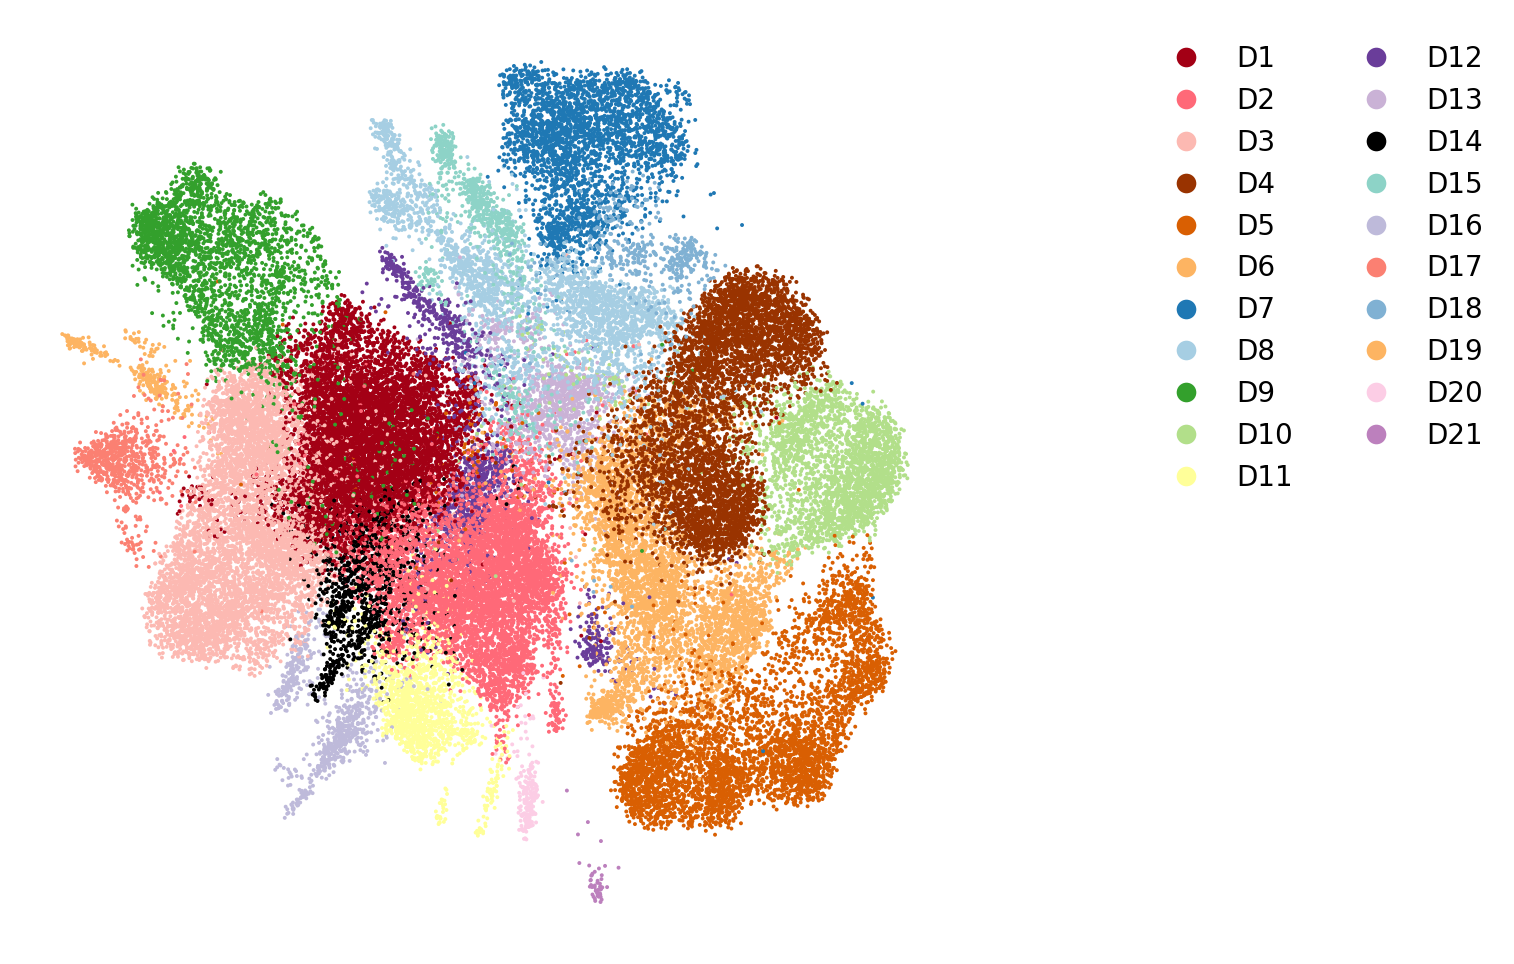

In [4]:
pdf = adata.obs.copy()

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 6, 6

sns.scatterplot(
    data=pdf,
    x='UMAP 1',
    y='UMAP 2',
    ec='none',
    s=2,
    hue='cluster_str',
    palette=plt2.CUSTOM_COLORS,
)

plt.xticks([])
plt.yticks([])

plt.ylabel('UMAP 2')
plt.xlabel('UMAP 1')
plt.gca().set_aspect('auto')
# sns.despine()
plt.axis(False)

sns.move_legend(plt.gca(),
                loc='upper right',
                title="",
                frameon=False,
                bbox_to_anchor=(1.6, 1),
                markerscale=5,
                ncol=2
               )
pdf.head()

['Reprogrammed Cells' 'Multipotent Progenitor' 'Multi-Lymphoid Progenitor'
 'Megakaryocyte-Erythroid Progenitor'
 'Lineage Negative (CD34low/CD164high)'
 'Lineage Negative (CD34Pos/CD164Pos)' 'Hematopoietic Stem Cell'
 'Fibroblast']


,n_counts,cell_type,dataset,organ_tissue,n_genes,new_cluster,cell_label,cluster_str,UMAP 1,UMAP 2
AAACCCAAGGTTACCT_iHSC,6558.0,iHSC,iHSC,nan,12480,1,Reprogrammed Cells,D2,8.989130,4.937538
GTCGTTCCAGCGTTGC_iHSC,6624.0,iHSC,iHSC,nan,12457,0,Reprogrammed Cells,D1,6.892259,5.143793
GTCTACCTCCAACCAA_iHSC,7834.0,iHSC,iHSC,nan,12503,1,Reprogrammed Cells,D2,9.725594,4.718451
GTCTACCTCAACCTTT_iHSC,14395.0,iHSC,iHSC,nan,13597,11,Reprogrammed Cells,D12,8.707822,4.972127
GTCTACCGTATCAGCT_iHSC,4882.0,iHSC,iHSC,nan,11880,1,Reprogrammed Cells,D2,10.550939,4.780005


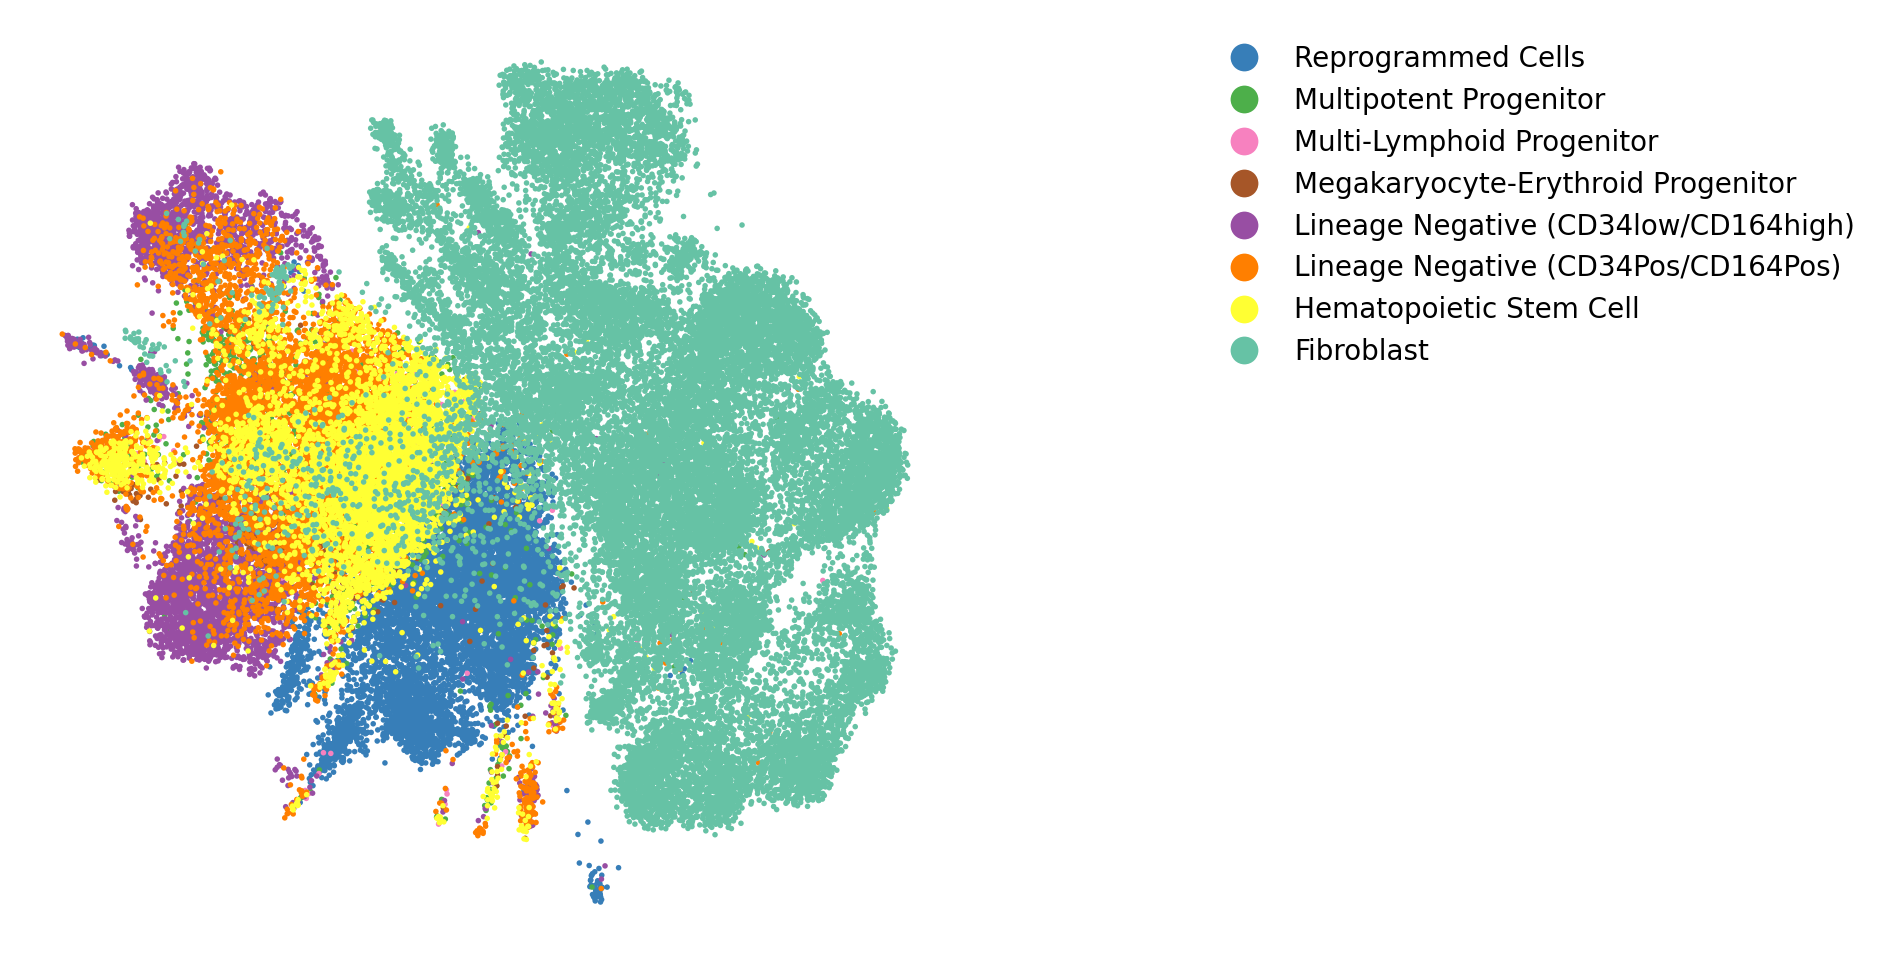

In [5]:
pdf = adata.obs.copy()
pdf['cell_label'] = pdf['cell_label'].astype(str)
pdf = pdf.sort_values(by='cell_label',  ascending=False)
print(pdf['cell_label'].unique())

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 6, 6

#     colors = [
#         "#C44D00",  # Darker Vermillion
#         "#E69F00",  # Orange
#         "#999999",  # Grey
#         "#CC79A7",  # Magenta
#         "#009E73",  # Green
#         "#56B4E9",  # Sky Blue
#         "#BA323F",  # Darker Red
#         "#8048A8",  # Darker Purple
#     ]
    

color_list = [
    '#377EB8', '#4DAF4A', '#F781BF', '#A65628', '#984EA3', '#FF7F00', '#FFFF33', '#66C2A5'
]

sns.scatterplot(
    data=pdf,
    x='UMAP 1',
    y='UMAP 2',
    ec='none',
    s=4,
    hue='cell_label',
    palette=color_list,
)

plt.xticks([])
plt.yticks([])

plt.ylabel('UMAP 2')
plt.xlabel('UMAP 1')
plt.gca().set_aspect('auto')
# sns.despine()
plt.axis(False)

sns.move_legend(
    plt.gca(),
    loc='upper right',
    title="",
    frameon=False,
    bbox_to_anchor=(2.0, 1),
    markerscale=5,
    ncol=1,
)

pdf.head()

In [6]:
# break

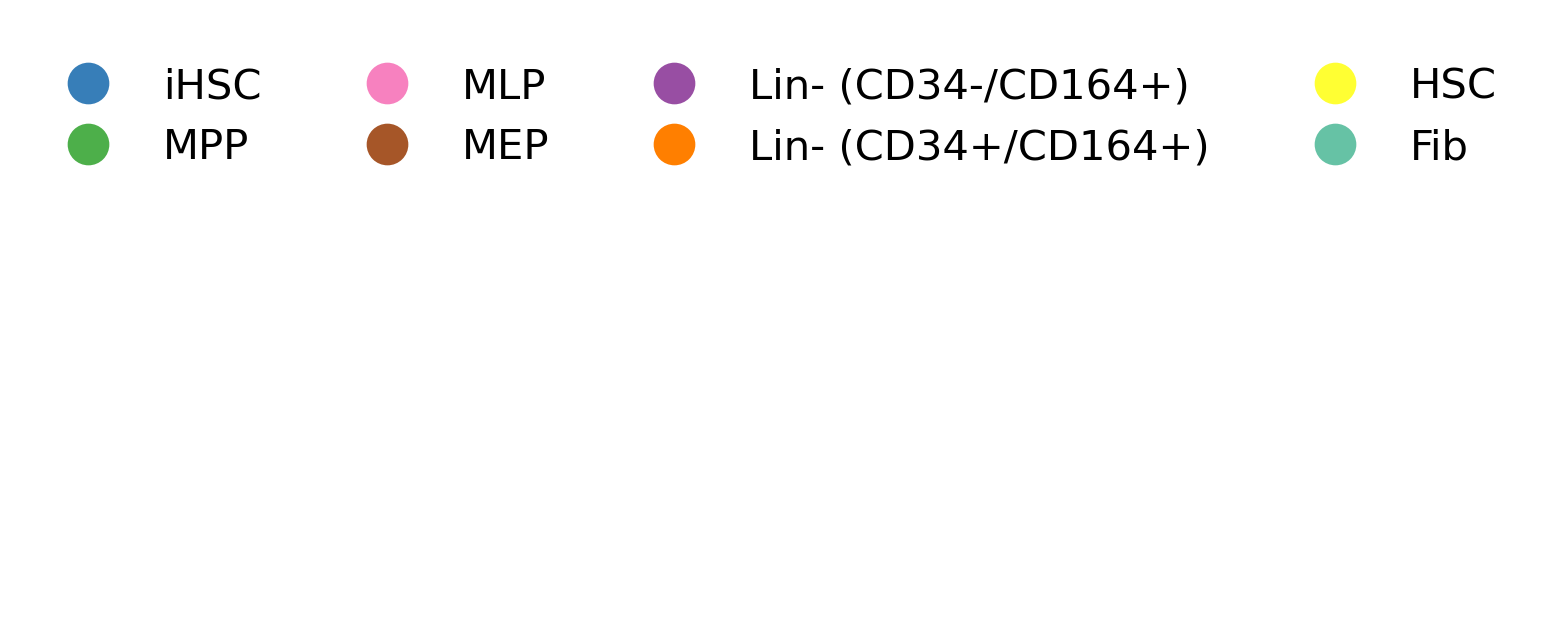

In [7]:
def make_legend():
    """Creates a standalone legend for the cell types with their respective colors."""

    labels = [
        "iHSC",   # "Reprogrammed Cells",
        "MPP",   # "Multipotent Progenitor",
        "MLP",   # "Multi-Lymphoid Progenitor",
        "MEP",   # "Megakaryocyte-Erythroid Progenitor",
        "Lin- (CD34-/CD164+)",   # "Lineage Negative (CD34low/CD164high)",
        "Lin- (CD34+/CD164+)",   # "Lineage Negative (CD34Pos/CD164Pos)",
        "HSC",   # "Hematopoietic Stem Cell",
        "Fib",   # "Fibroblast",
    ]

    colors = [
      '#377EB8', '#4DAF4A', '#F781BF', '#A65628', '#984EA3', '#FF7F00', '#FFFF33', '#66C2A5']
    
    


    fig = plt.figure(figsize=(4, 2.5))  # Set the figure size appropriately
    ax = fig.add_subplot(111)

    for label, color in zip(labels, colors):
        ax.plot([], [], 
                marker='o', 
                linestyle='none', 
                color=color, label=label)

    ax.legend(
        frameon=False,
        loc='best',
        markerscale=1.5,
        ncols=4,
    )
    ax.axis('off')

    plt.show()
    
plt.rcParams['figure.dpi'] = 300
make_legend()

In [8]:
# break

['Bladder' 'Fat' 'Large Intestine' 'Prostate' 'Small Intestine' 'Thymus'
 'Tongue' 'Trachea' 'Vasculature']


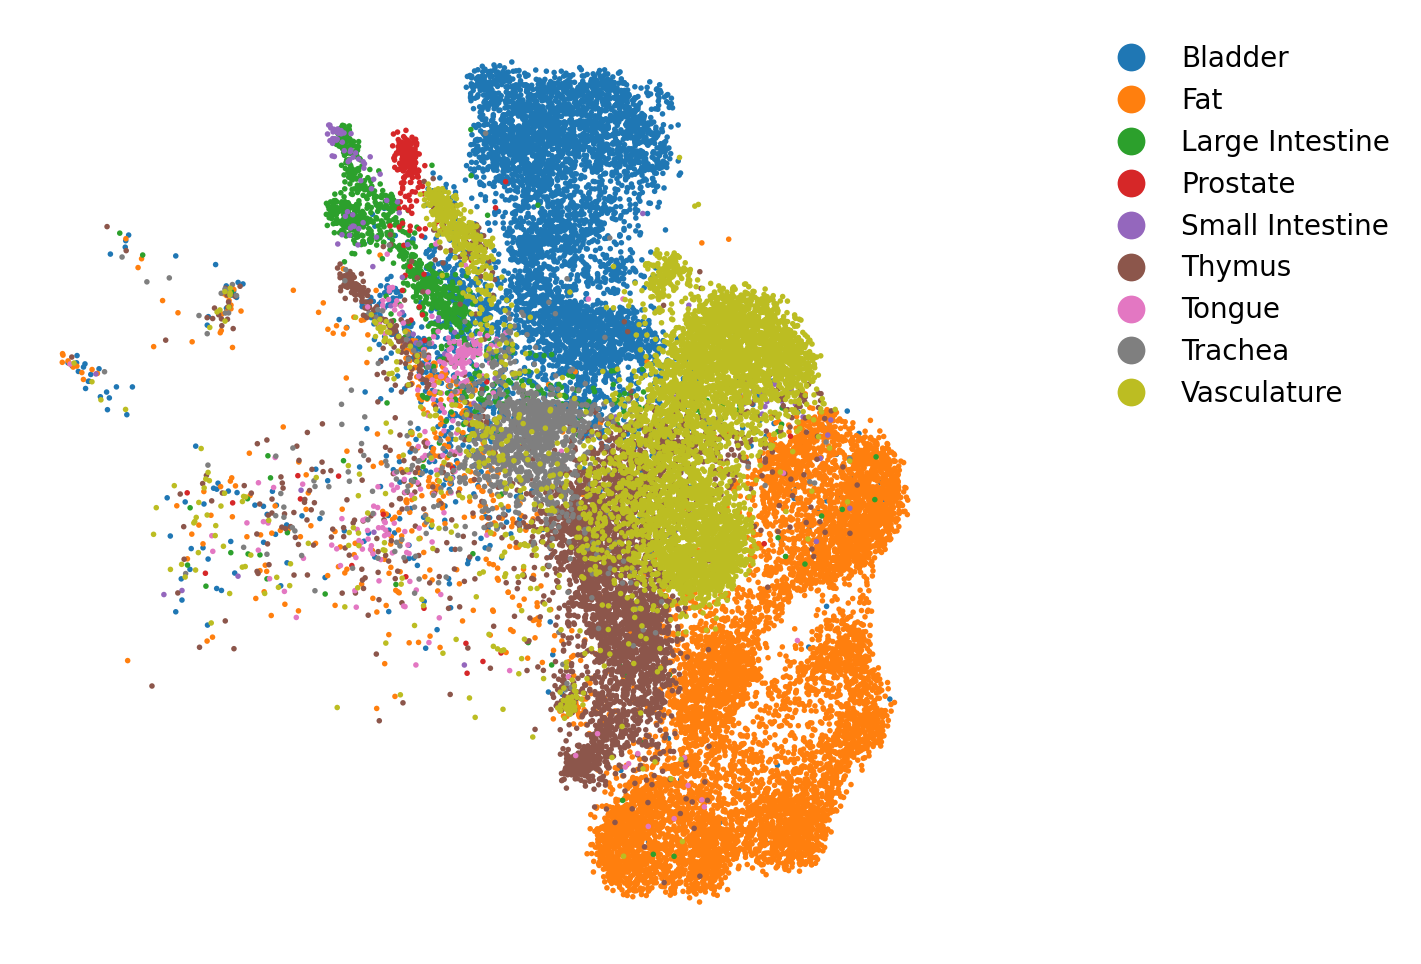

In [9]:
pdf = adata.obs.copy()

thresh = 0.20

pdf = pdf[pdf['cell_type'] == 'FB']
pdf['organ_tissue'] = pdf['organ_tissue'].astype(str)

pdf['organ_tissue'] = pdf['organ_tissue'].apply(lambda x: x.replace("_", " "))
pdf = pdf.sort_values(by='organ_tissue')
print(pdf['organ_tissue'].unique()) 

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 6, 6



sns.scatterplot(
    data=pdf,
    x='UMAP 1',
    y='UMAP 2',
    ec='none',
    s=4,
    hue='organ_tissue',
    zorder=0,
)

# sns.kdeplot(
#     data=pdf, 
#     x='UMAP 1', 
#     y='UMAP 2', 
#     levels=2, 
#     thresh=thresh,
#     fill=True,   # Fill the area between the contour lines
#     alpha=0.35,  
#     hue='organ_tissue',
#     palette=color_list,
#     zorder=2,
# )

# sns.kdeplot(
#     data=pdf, 
#     x='UMAP 1', 
#     y='UMAP 2', 
#     levels=2,  
#     thresh=thresh,
#     hue='organ_tissue',
#     palette=color_list,
#     linewidths=1,
#     zorder=2,
# )

plt.xticks([])
plt.yticks([])

plt.ylabel('UMAP 2')
plt.xlabel('UMAP 1')
plt.gca().set_aspect('auto')
plt.axis(False)

sns.move_legend(
    plt.gca(),
    loc='upper right',
    title="",
    frameon=False,
    bbox_to_anchor=(1.5, 1),
    markerscale=5,
    ncol=1,
)

In [10]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
import matplotlib.patches as mpatches

# Data (Color names and labels)
color_names = ["Cyan", "Pink", "Light Green", "Orange", "Yellow", "Purple", "Crimson", "Navy Blue", "Brown"]
labels = ["Bladder", "Fat", "Large Intestine", "Prostate", "Small Intestine", "Thymus", "Tongue", "Trachea", "Vasculature"]
colors = ["#00FFFF", "#FFC0CB", "#90EE90", "#FFA500", "#FFFF00", "#800080", "#DC143C", "#000080", "#A52A2A"]

# Create Legend Elements
legend_elements = []
for i in range(len(labels)):
    legend_elements.append(mpatches.Patch(color=colors[i], label=f"{labels[i]}"))  # Use rectangle patches

# Create and Configure Legend
fig = plt.figure()  # Create a figure for the legend
ax = fig.add_subplot(111)  # Add a subplot (not used for plotting)
ax.set_axis_off()  # Hide axis

# Legend options
legend = ax.legend(handles=legend_elements, loc='center', fontsize=12, ncol=1)

# Fine-tune Legend appearance
plt.setp(legend.get_texts(), color='black')  # Ensure text color is black
fig.canvas.draw()  # Draw the figure to calculate sizes

# Adjust spacing (optional)
bbox = legend.get_window_extent()  # Get legend bounding box
bbox = bbox.transformed(fig.dpi_scale_trans.inverted())  # Scale to inches
fig.set_size_inches(bbox.width * 1.1, bbox.height * 1.1)  # Add a bit of padding

# Save or Display
#plt.savefig("legend.png", bbox_inches='tight', dpi=300)  # Save as high-resolution image
plt.show()  # Display the legend

In [ ]:
pdf = adata.obs.copy()
pdf['cell_label'] = pdf['cell_label'].astype(str)
cell_types_to_include = ['HSC', 'iHSC', 'FB']
mask = pdf['cell_type'].isin(cell_types_to_include)

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 6, 6


sns.scatterplot(
    data=pdf,
    x='UMAP 1',
    y='UMAP 2',
    ec='none',
    s=4,
    color='lightgrey',
    zorder=0,
)

sns.kdeplot(
    data=pdf[mask], 
    x='UMAP 1', 
    y='UMAP 2', 
    levels=2, 
    fill=True,   # Fill the area between the contour lines
    alpha=0.35,  
    hue='cell_label',
    hue_order=sorted(pdf[mask]['cell_label'].unique()),
    palette='gnuplot',
    zorder=2,
)

sns.kdeplot(
    data=pdf[mask], 
    x='UMAP 1', 
    y='UMAP 2', 
    levels=2,  
    hue='cell_label',
    hue_order=sorted(pdf[mask]['cell_label'].unique()),
    palette='gnuplot',
    linewidths=1,
    zorder=2,
)

plt.xticks([])
plt.yticks([])

plt.ylabel('UMAP 2')
plt.xlabel('UMAP 1')
plt.gca().set_aspect('auto')
plt.axis(False)

sns.move_legend(
    plt.gca(),
    loc='upper right',
    title="",
    frameon=False,
    bbox_to_anchor=(1.5, 1),
    markerscale=5,
    ncol=1,
)

# All cell types

In [ ]:
pdf = adata.obs.copy()
pdf['cell_label'] = pdf['cell_label'].astype(str)
pdf = pdf.sort_values(by='cell_label')

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 5, 5

color_list = [
    '#377EB8', 
    '#4DAF4A', 
    '#F781BF', 
    '#A65628', 
    '#984EA3', 
    '#FF7F00',
    '#FFFF33',
    '#66C2A5'
][::-1]



for i, (cell_type, group) in enumerate(pdf.groupby('cell_label', sort=False)):
    mask = (pdf['cell_label'] == cell_type)
    
    sns.scatterplot(
        data=pdf,
        x='UMAP 1',
        y='UMAP 2',
        ec='none',
        s=4,
        color='lightgrey',
        zorder=0,
    )
    
    
    sns.scatterplot(
        data=pdf[mask],
        x='UMAP 1',
        y='UMAP 2',
        ec='none',
        s=2,
        alpha=0.4,
        color=color_list[i],
        zorder=5,
    )
    
    
    sns.kdeplot(
        data=pdf[mask], 
        x='UMAP 1', 
        y='UMAP 2', 
        levels=2, 
        fill=True,   
        alpha=0.35,  
        color=color_list[i],
        zorder=2,
    )
    
    sns.kdeplot(
        data=pdf[mask], 
        x='UMAP 1', 
        y='UMAP 2', 
        levels=2,  
        color=color_list[i],
        linewidths=1,
        zorder=2,
    )
    
    sns.despine()
    plt.xticks([])
    plt.yticks([])

    plt.ylabel('UMAP 2')
    plt.xlabel('UMAP 1')
    plt.gca().set_aspect('auto')
    
    plt.title(cell_type)
    plt.show()

# Expression

In [ ]:
reload(plt2)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 6, 6

gene = 'GFI1B'
vmin = 0
vmax = 2
expression = adata[:, gene].to_df().values.ravel()

order = np.argsort(expression)

# Determine vmin and vmax if not provided
vmin = max(np.min(expression), vmin)
vmax = min(np.max(expression), vmax)

print(f"{vmin=}")
print(f"{vmax=}")

fig, ax = plt.subplots()

scatter = ax.scatter(
    adata.obsm['X_umap'][:, 0][order],
    adata.obsm['X_umap'][:, 1][order],
    c=expression[order],
    cmap='viridis',
    vmin=vmin,
    vmax=vmax,
    s=4,
)

sns.kdeplot(
    data=pdf[mask], 
    x='UMAP 1', 
    y='UMAP 2', 
    levels=2,  
    hue='cell_label',
    hue_order=sorted(pdf[mask]['cell_label'].unique()),
    palette='gnuplot',
    linewidths=3,
    zorder=2,
)

plt.title(gene)
plt.gca().set_aspect('auto')
plt.xticks([])
plt.yticks([])

plt.ylabel('UMAP 2')
plt.xlabel('UMAP 1')

plt.legend().remove()

plt.axis(False)

plt2.create_standalone_colorbar(scatter)

In [ ]:
break